## **Base de dados de crédito**

**Dados coletados:** https://www.kaggle.com/laotse/credit-risk-dataset

**Sobre o conjunto de dados**

Descrição detalhada dos dados do conjunto de dados de Risco de Crédito:

Nome do recurso	Descrição

person_age:	Idade

person_income:	Renda Anual

person_home_ownership:	Casa própria

person_emp_length:	Duração do emprego (em anos)

loan_intent:	Intenção de empréstimo

loan_grade:	Grau de empréstimo

loan_amnt:	Valor do empréstimo

loan_int_rate:	Taxa de juros

loan_status:	Status do empréstimo (0 é não inadimplência, 1 é inadimplência)

loan_percent_income:	Percentual de renda

cb_person_default_on_file:	Inadimplência histórica

cb_preson_cred_hist_length:	Duração do histórico de crédito

### **Importação das Bibliotecas e carregamento dos dados** 

In [182]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as nnf
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')
plt.style.use('dark_background')

np.random.seed(123)

torch.manual_seed(123)

df = pd.read_csv('/Users/diogomonteiro/Datasets/credit_risk.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### **Análise Exploratória dos dados** 

_______________________________________________________
COLUNA: person_age
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 58
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:32523
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64
-------------------------------------------------------


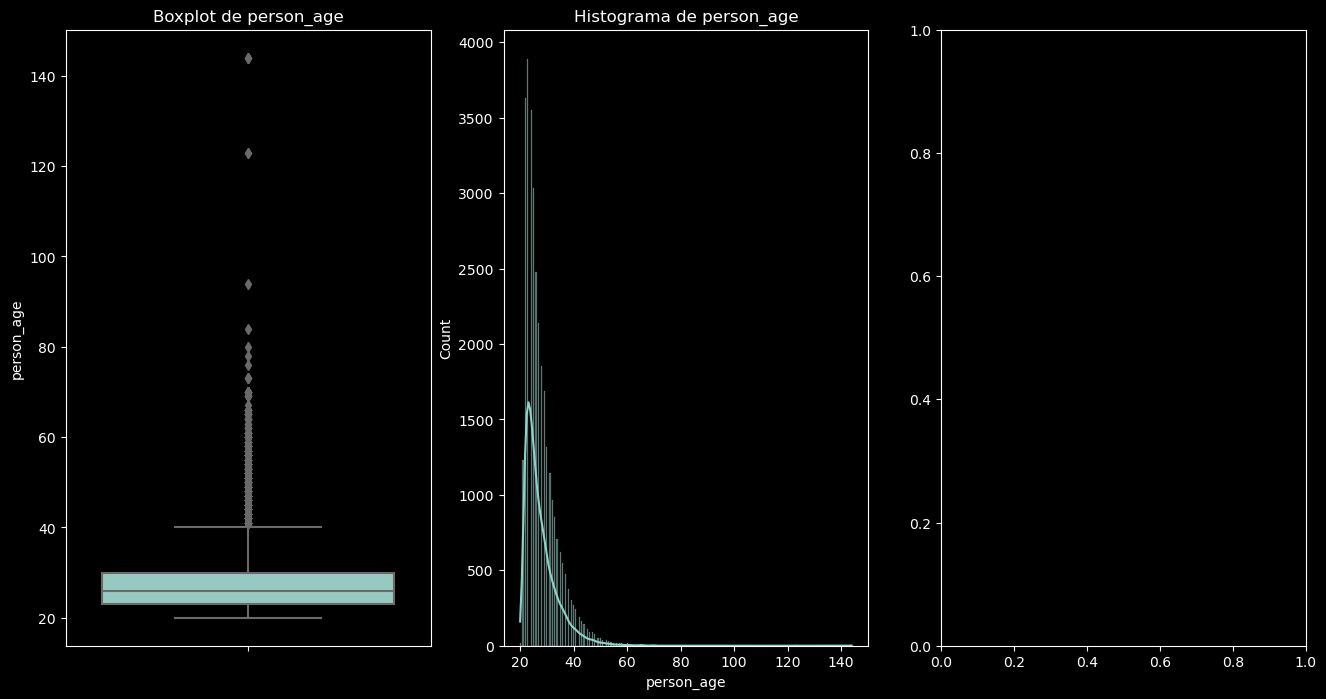

_______________________________________________________
COLUNA: person_income
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 4295
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28286
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64
-------------------------------------------------------


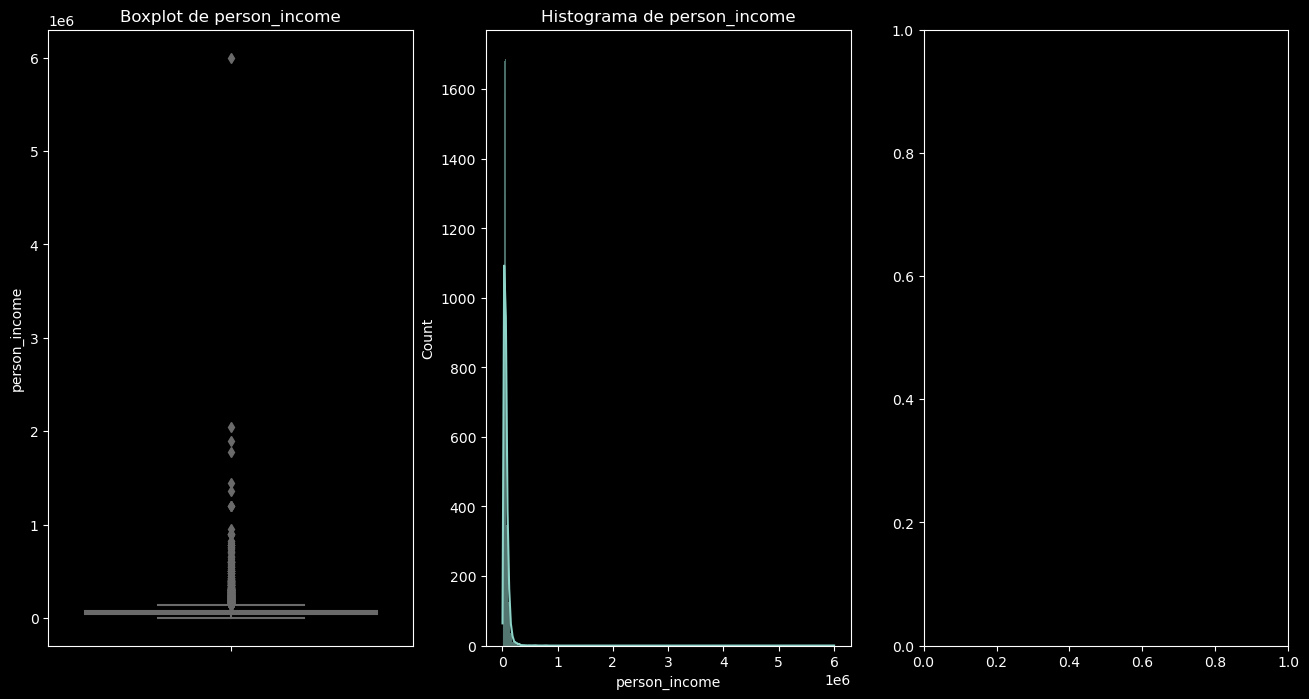

_________________________________________________
COLUNA: person_home_ownership
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 4
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:32577
-------------------------------------------------
Contagem de valores:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
-------------------------------------------------


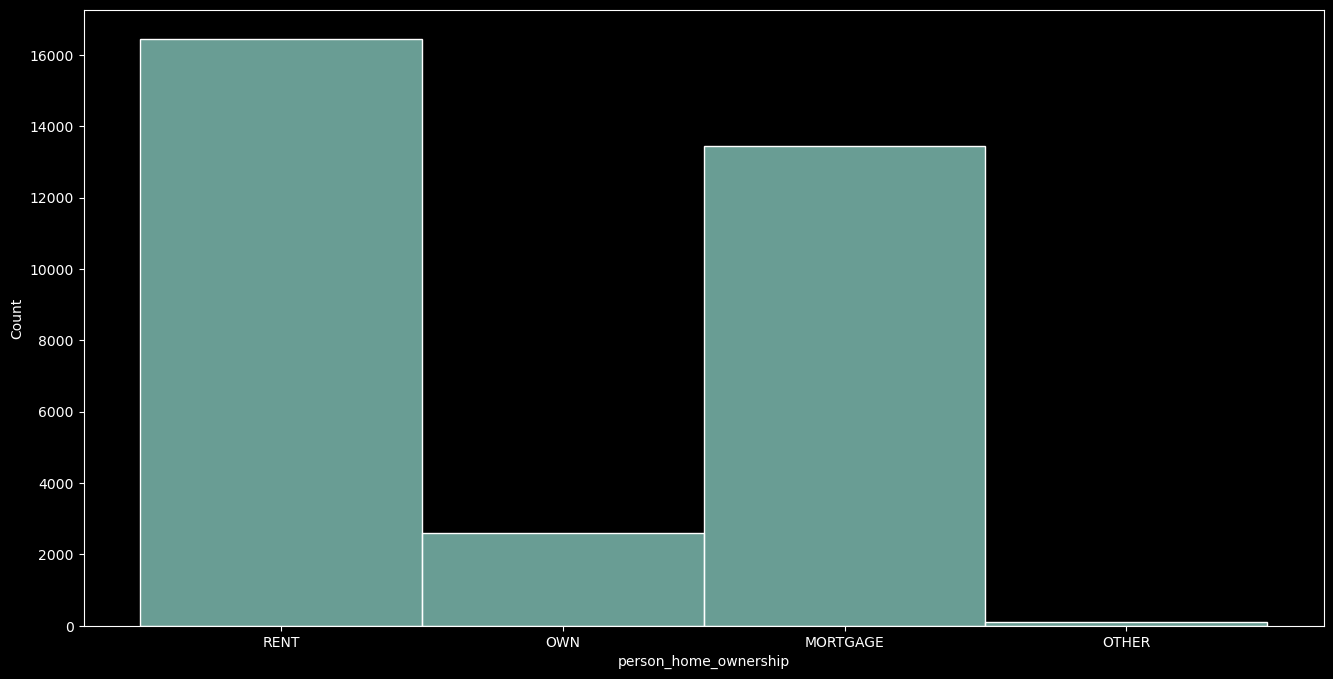

_______________________________________________________
COLUNA: person_emp_length
-------------------------------------------------------
Tipo da coluna: float64
-------------------------------------------------------
Valores unicos: 36
-------------------------------------------------------
Valores nulos:895
-------------------------------------------------------
Valores duplicados:32544
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64
-------------------------------------------------------


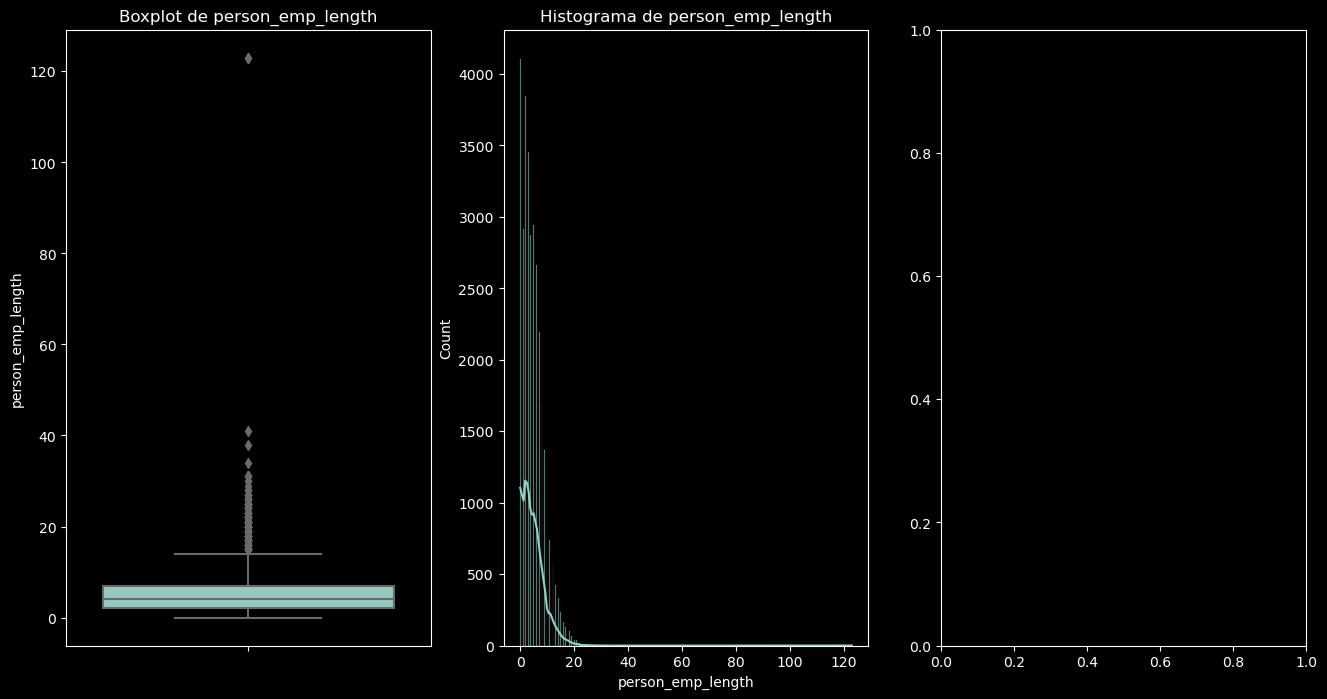

_________________________________________________
COLUNA: loan_intent
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 6
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:32575
-------------------------------------------------
Contagem de valores:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
-------------------------------------------------


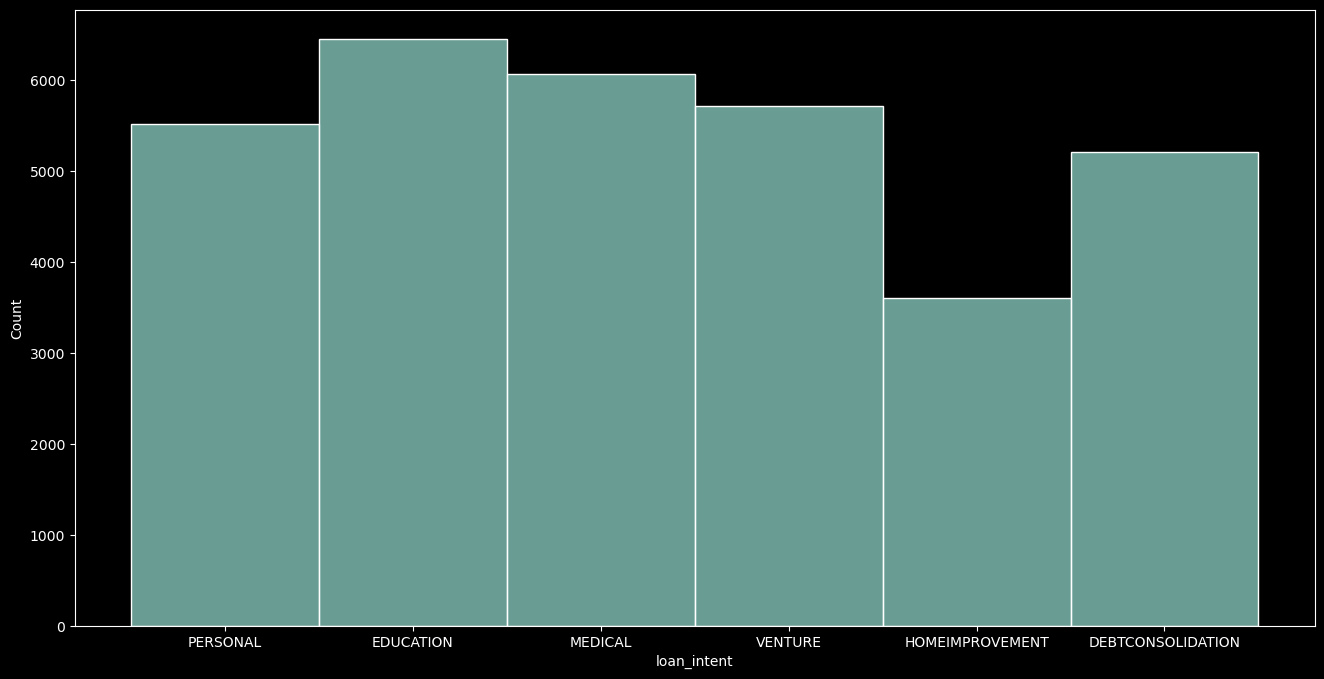

_________________________________________________
COLUNA: loan_grade
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 7
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:32574
-------------------------------------------------
Contagem de valores:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
-------------------------------------------------


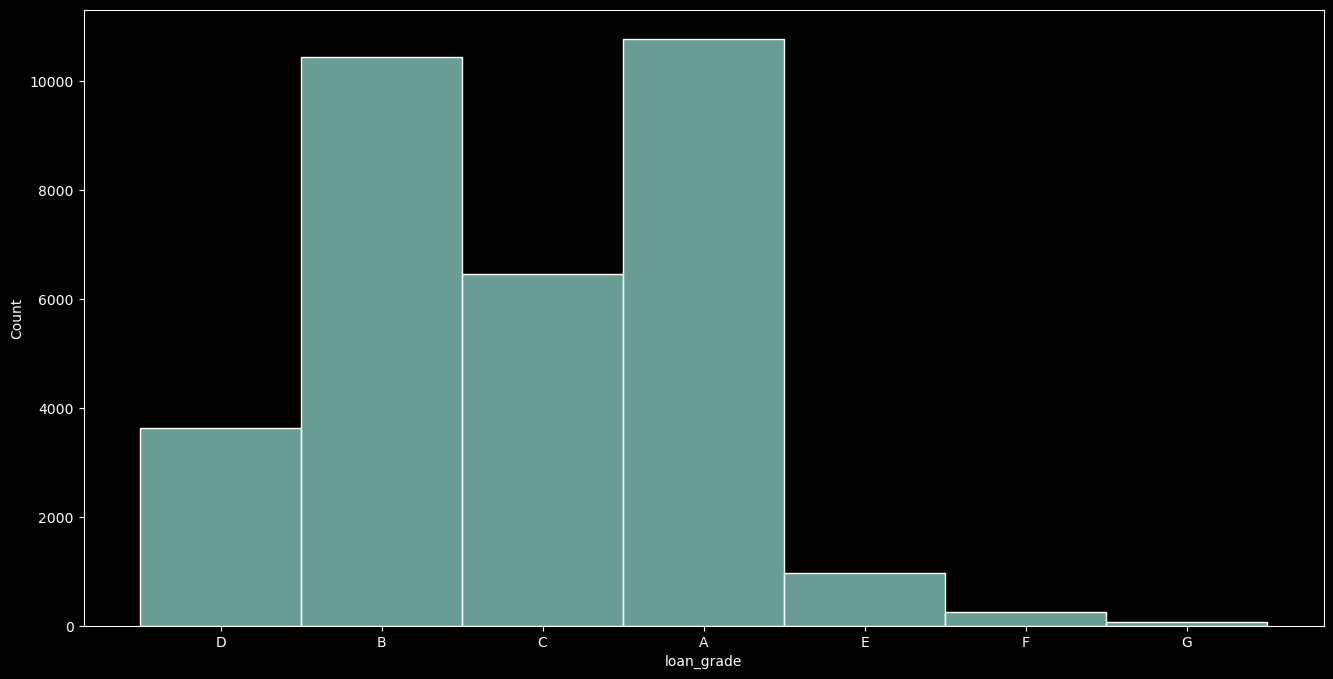

_______________________________________________________
COLUNA: loan_amnt
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 753
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:31828
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    32581.000000
mean      9589.371106
std       6322.086646
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64
-------------------------------------------------------


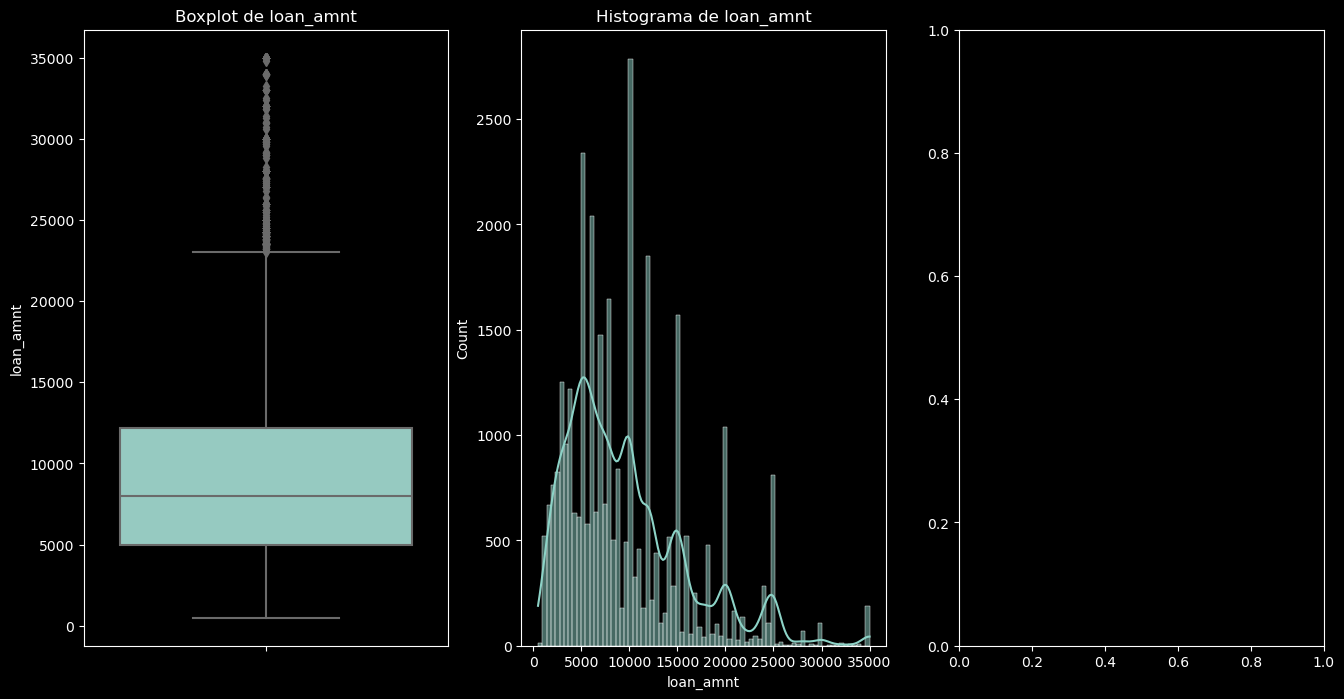

_______________________________________________________
COLUNA: loan_int_rate
-------------------------------------------------------
Tipo da coluna: float64
-------------------------------------------------------
Valores unicos: 348
-------------------------------------------------------
Valores nulos:3116
-------------------------------------------------------
Valores duplicados:32232
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64
-------------------------------------------------------


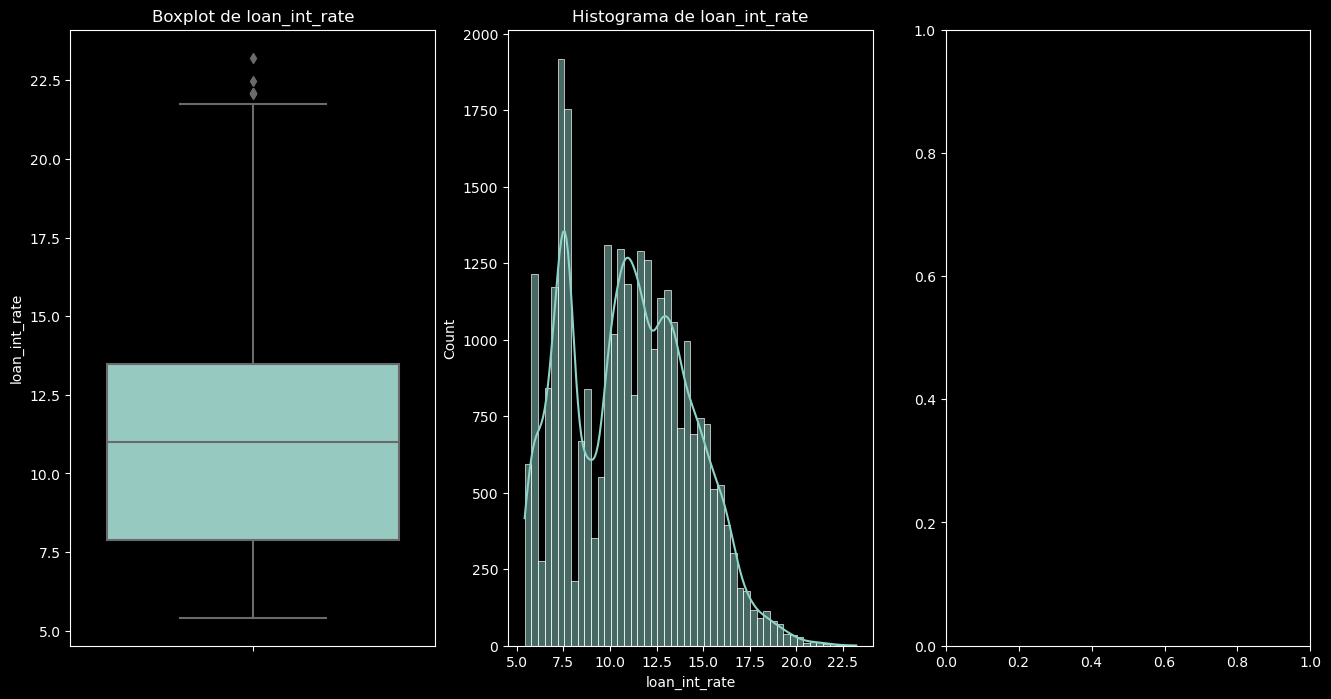

_______________________________________________________
COLUNA: loan_status
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 2
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:32579
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64
-------------------------------------------------------


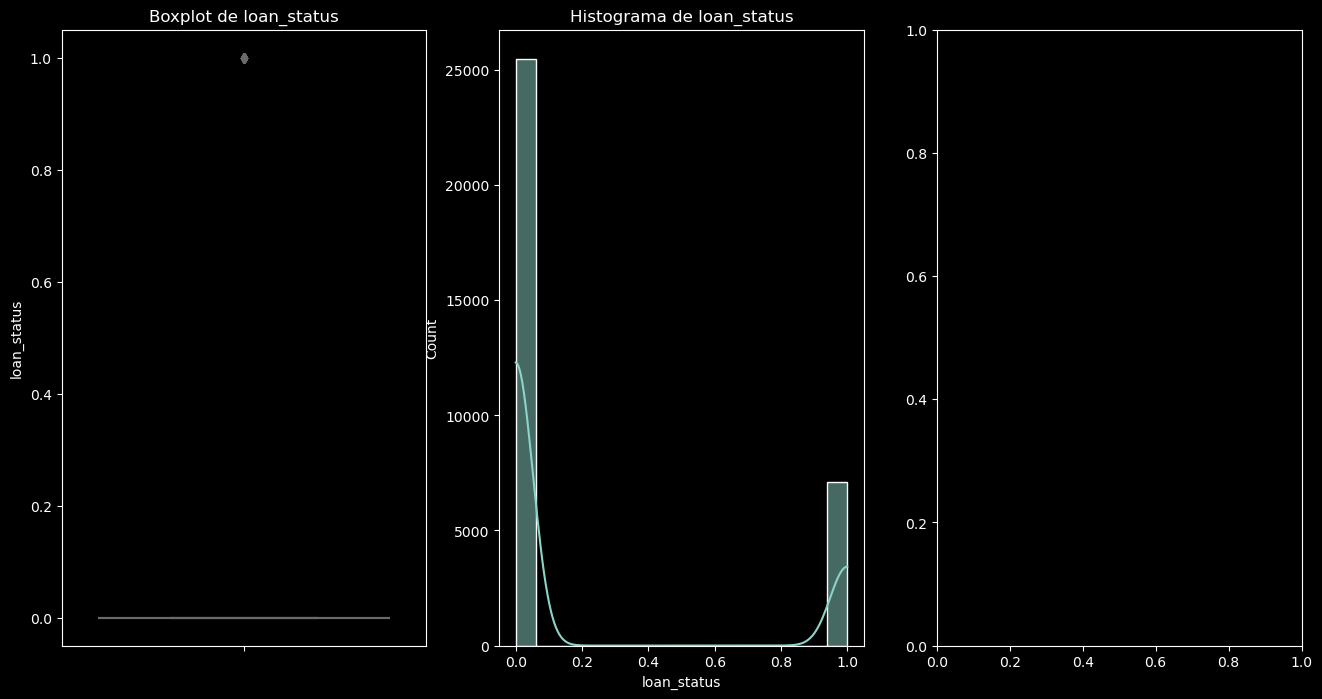

_______________________________________________________
COLUNA: loan_percent_income
-------------------------------------------------------
Tipo da coluna: float64
-------------------------------------------------------
Valores unicos: 77
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:32504
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    32581.000000
mean         0.170203
std          0.106782
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64
-------------------------------------------------------


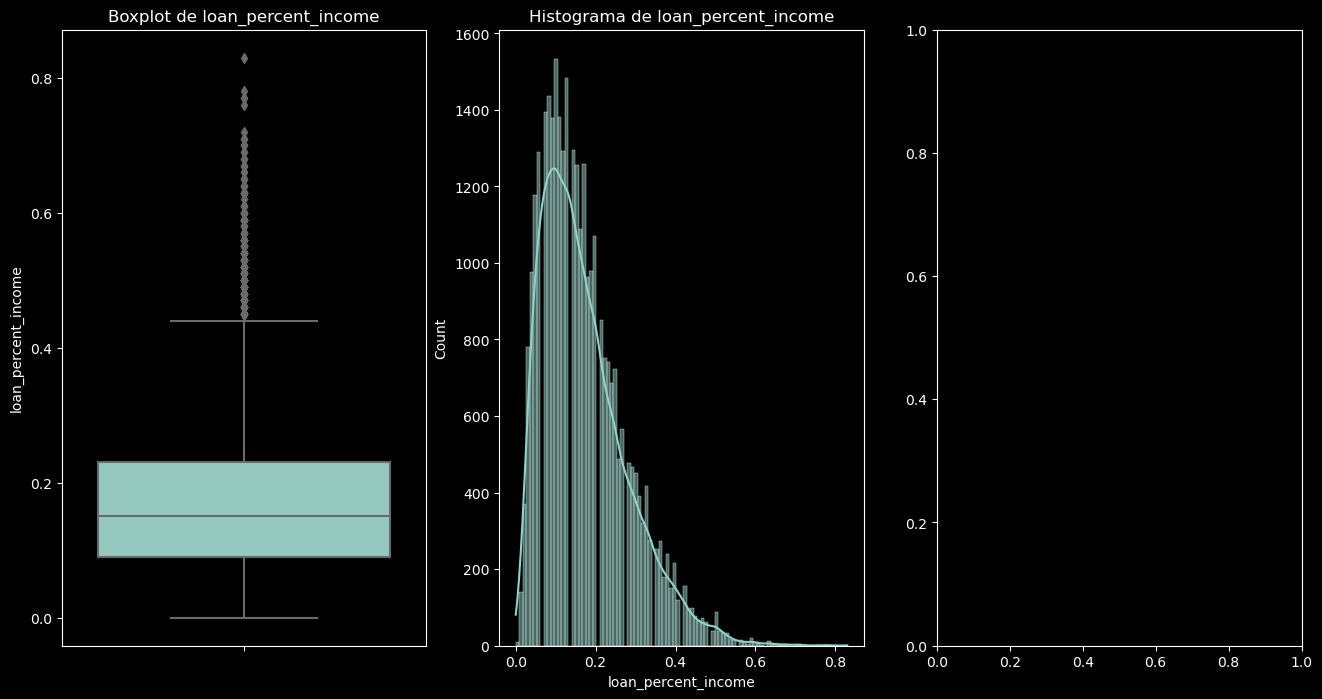

_________________________________________________
COLUNA: cb_person_default_on_file
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 2
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:32579
-------------------------------------------------
Contagem de valores:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
-------------------------------------------------


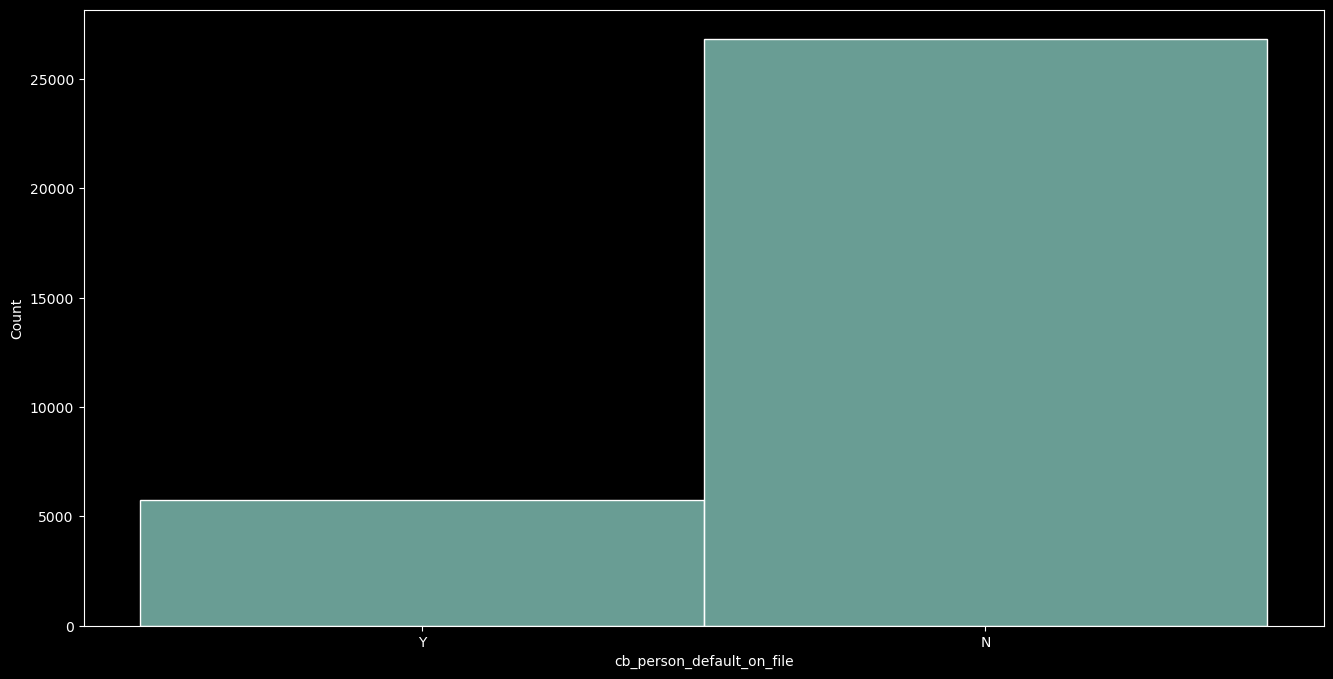

_______________________________________________________
COLUNA: cb_person_cred_hist_length
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 29
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:32552
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    32581.000000
mean         5.804211
std          4.055001
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64
-------------------------------------------------------


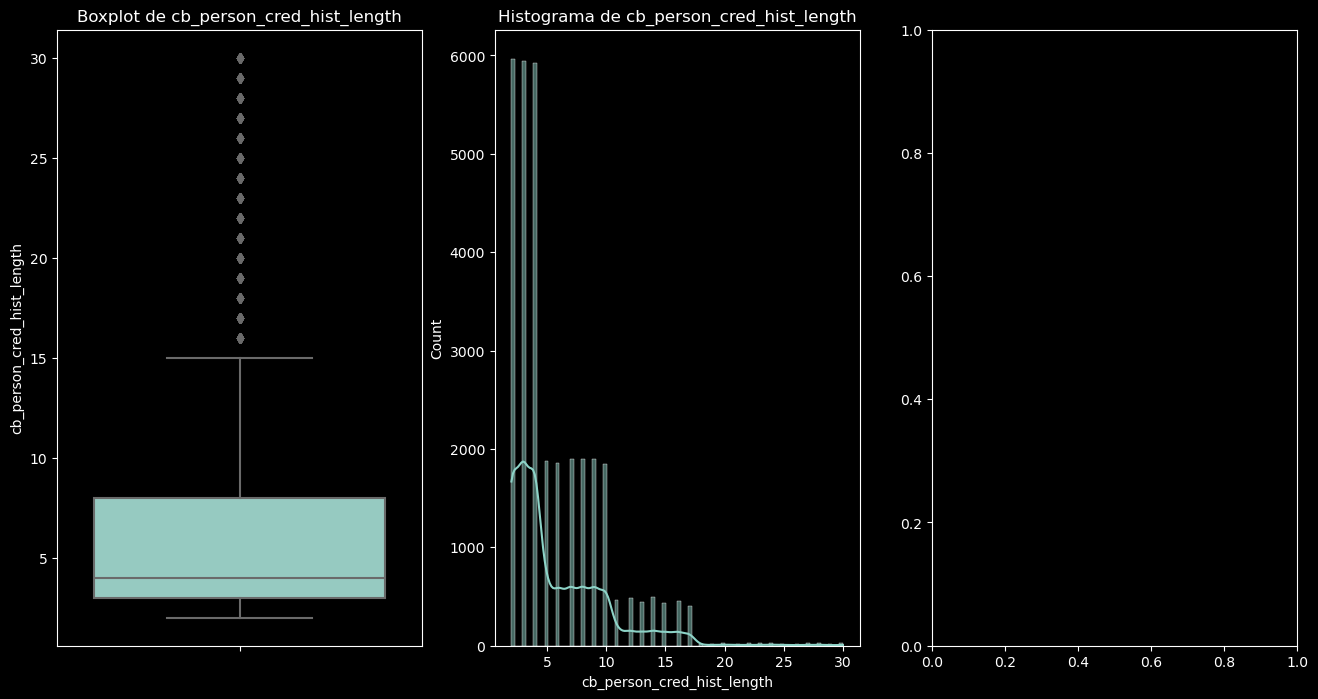

In [133]:
# Função para analise das colunas

def analise(df):
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            print('_______________________________________________________')
            print(f'COLUNA: {df[i].name}')
            print('-------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print('-------------------------------------------------------')
            print(f'Valores unicos: {df[i].nunique()}')
            print('-------------------------------------------------------')
            print(f'Valores nulos:{df[i].isna().sum()}')
            print('-------------------------------------------------------')
            print(f'Valores duplicados:{df[i].duplicated().sum()}')
            print('-------------------------------------------------------')
            print(f'Analisando a média, mediana, desvio padrão e quartis:\n{df[i].describe()}')
            print('-------------------------------------------------------')
            # Crie a figura e os eixos
            fig, axs = plt.subplots(1, 3, figsize=(16, 8))
    
            # Plotando o boxplot no primeiro eixo
            sns.boxplot(y=df[i], ax=axs[0])
            axs[0].set_title(f'Boxplot de {df[i].name}')
    
            # Plotando o histograma no segundo eixo
            sns.histplot(df[i], kde=True, ax=axs[1])
            axs[1].set_title(f'Histograma de {df[i].name}')
    
            # Mostrando os plots
            plt.show();

        else:

            print('_________________________________________________')
            print(f'COLUNA: {df[i].name}')
            print('-------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print('-------------------------------------------------')
            print(f'Valores unicos: {df[i].nunique()}')
            print('-------------------------------------------------')
            print(f'Valores nulos:{df[i].isna().sum()}')
            print('-------------------------------------------------')
            print(f'Valores duplicados:{df[i].duplicated().sum()}')
            print('-------------------------------------------------')
            print(f'Contagem de valores:\n{df[i].value_counts()}')
            print('-------------------------------------------------')
            plt.figure(figsize=(16,8))
            sns.histplot(df[i])
            plt.show();

# Função para analise das colunas individual
def analise_ind(df):

    if df.dtypes == 'int64' or df.dtypes == 'float64':
        print('_______________________________________________________')
        print(f'COLUNA: {df.name}')
        print('-------------------------------------------------------')
        print(f'Tipo da coluna: {df.dtypes}')
        print('-------------------------------------------------------')
        print(f'Valores unicos: {df.nunique()}')
        print('-------------------------------------------------------')
        print(f'Valores nulos:{df.isna().sum()}')
        print('-------------------------------------------------------')
        print(f'Valores duplicados:{df[i].duplicated().sum()}')
        print('-------------------------------------------------------')
        print(f'Analisando a média, mediana, desvio padrão e quartis:\n{df.describe()}')
        print('-------------------------------------------------------')
        # Crie a figura e os eixos
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))

        # Plotando o boxplot no primeiro eixo
        sns.boxplot(y=df[i], ax=axs[0])
        axs[0].set_title(f'Boxplot de {df[i].name}')

        # Plotando o histograma no segundo eixo
        sns.histplot(df[i], kde=True, ax=axs[1])
        axs[1].set_title(f'Histograma de {df[i].name}')

        # Mostrando os plots
        plt.show();

    else:
        print('_________________________________________________')
        print(f'COLUNA: {df.name}')
        print('-------------------------------------------------')
        print(f'Tipo da coluna: {df.dtypes}')
        print('-------------------------------------------------')
        print(f'Valores unicos: {df.nunique()}')
        print('-------------------------------------------------')
        print(f'Valores nulos:{df.isna().sum()}')
        print('-------------------------------------------------')
        print(f'Valores duplicados:{df[i].duplicated().sum()}')
        print('-------------------------------------------------')
        print(f'Contagem de valores:\n{df.value_counts()}')
        print('-------------------------------------------------')
        plt.figure(figsize=(16,8))
        sns.histplot(df)
        plt.show();

analise(df)

Analisando as variáveis, percebi que temos dados nulos e outliers.

Outliers na idade e no tempo de trabalho na empresa.

### **Tratamento dos dados**

In [136]:
df1 = df.copy()
df1 = df1.loc[df1['person_age'] < 90,:]
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [137]:
df1 = df1.dropna()
df1.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [138]:
df1 = df1.loc[df1.person_emp_length <= 35,:]
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


_______________________________________________________
COLUNA: person_age
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 54
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28576
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.000000
mean        27.709501
std          6.163232
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         84.000000
Name: person_age, dtype: float64
-------------------------------------------------------


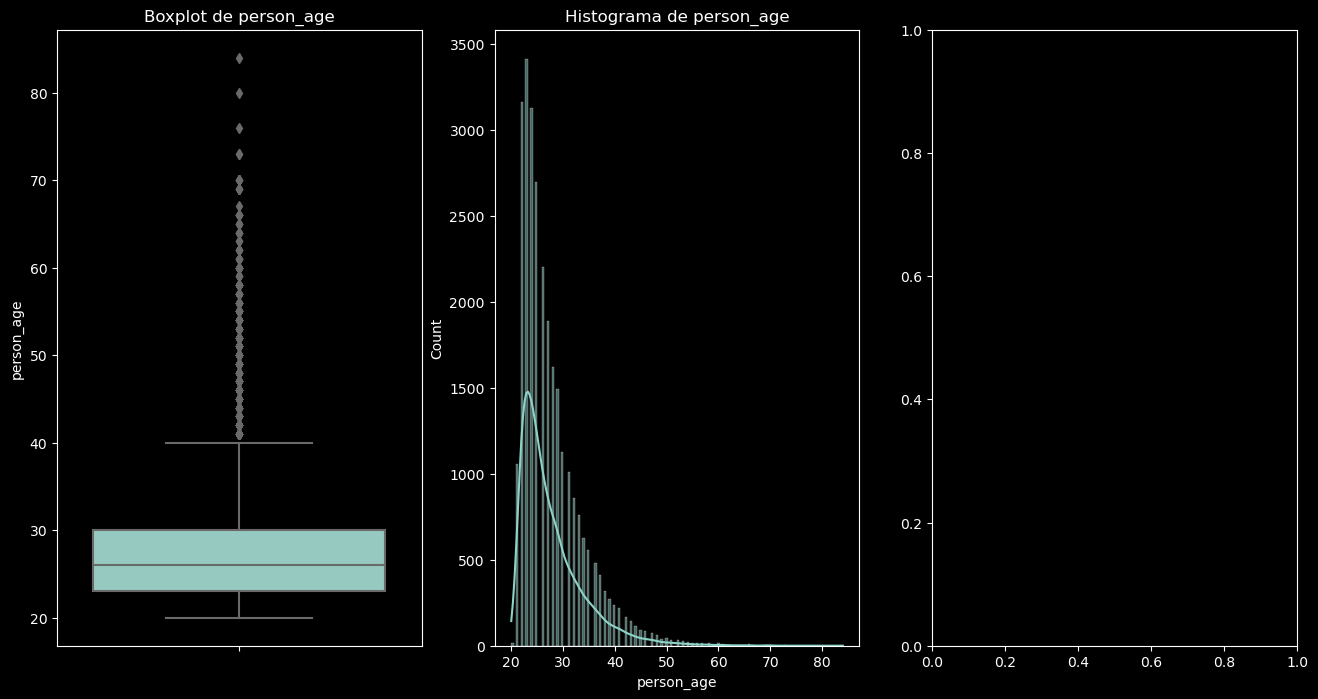

_______________________________________________________
COLUNA: person_income
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 3834
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:24796
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    2.863000e+04
mean     6.642577e+04
std      5.154861e+04
min      4.000000e+03
25%      3.945600e+04
50%      5.590000e+04
75%      8.000000e+04
max      2.039784e+06
Name: person_income, dtype: float64
-------------------------------------------------------


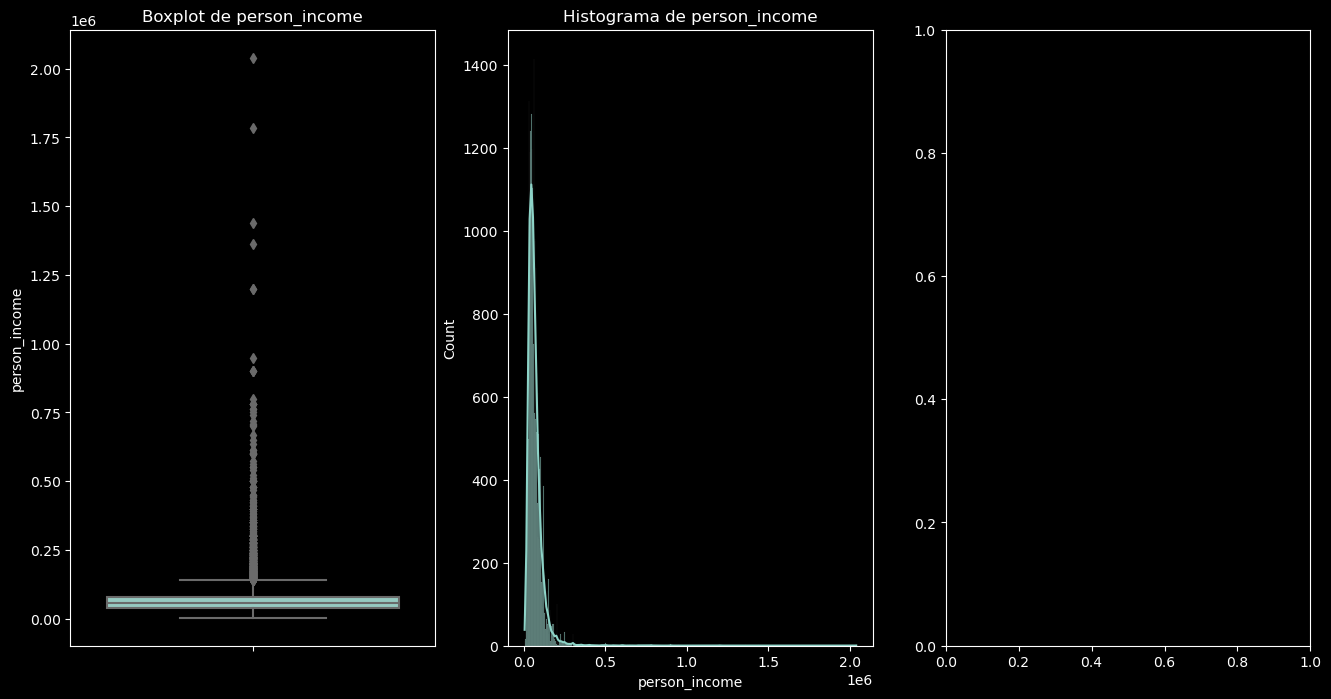

_________________________________________________
COLUNA: person_home_ownership
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 4
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:28626
-------------------------------------------------
Contagem de valores:
person_home_ownership
RENT        14547
MORTGAGE    11797
OWN          2192
OTHER          94
Name: count, dtype: int64
-------------------------------------------------


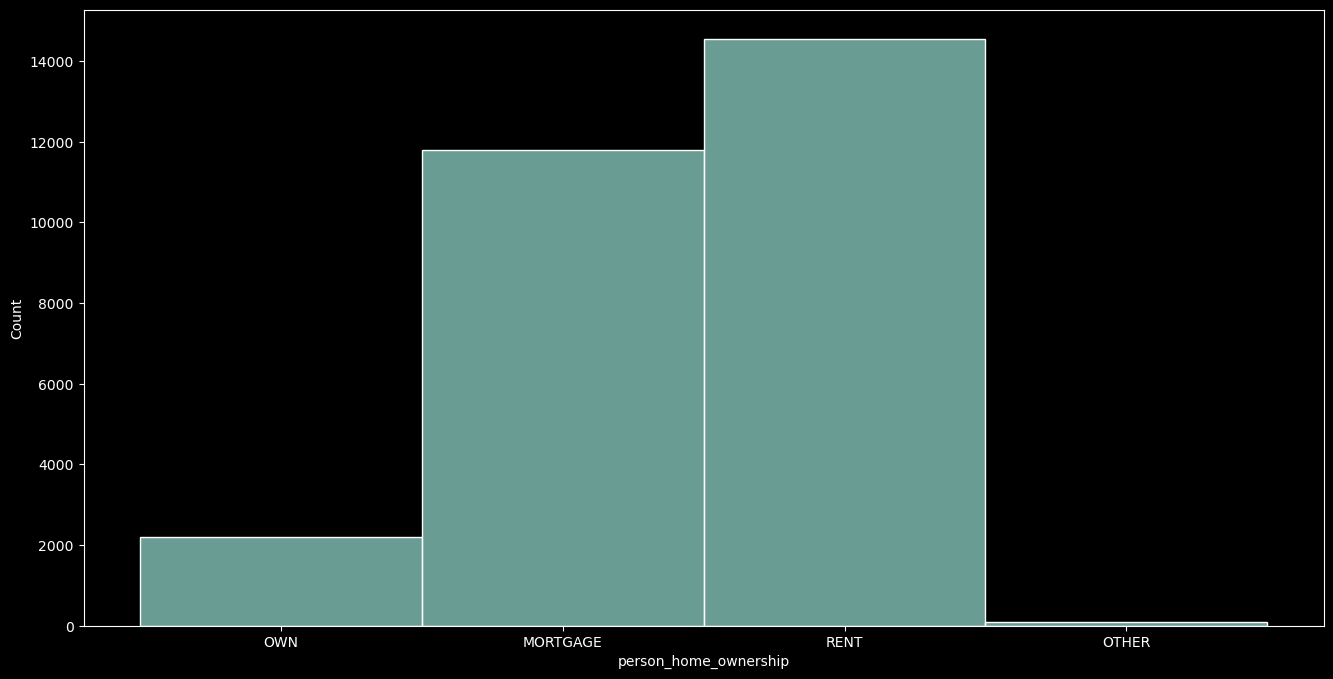

_______________________________________________________
COLUNA: person_emp_length
-------------------------------------------------------
Tipo da coluna: float64
-------------------------------------------------------
Valores unicos: 33
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28597
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.00000
mean         4.77789
std          4.02529
min          0.00000
25%          2.00000
50%          4.00000
75%          7.00000
max         34.00000
Name: person_emp_length, dtype: float64
-------------------------------------------------------


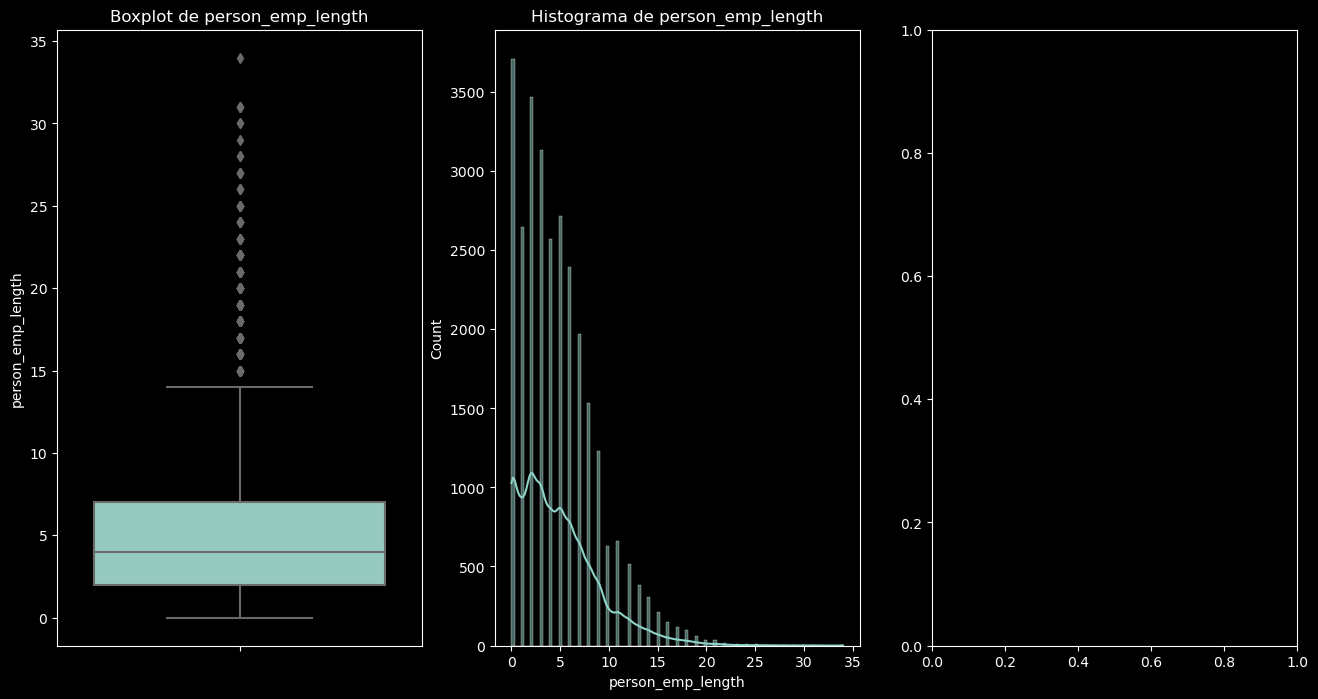

_________________________________________________
COLUNA: loan_intent
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 6
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:28624
-------------------------------------------------
Contagem de valores:
loan_intent
EDUCATION            5702
MEDICAL              5292
VENTURE              4999
PERSONAL             4874
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64
-------------------------------------------------


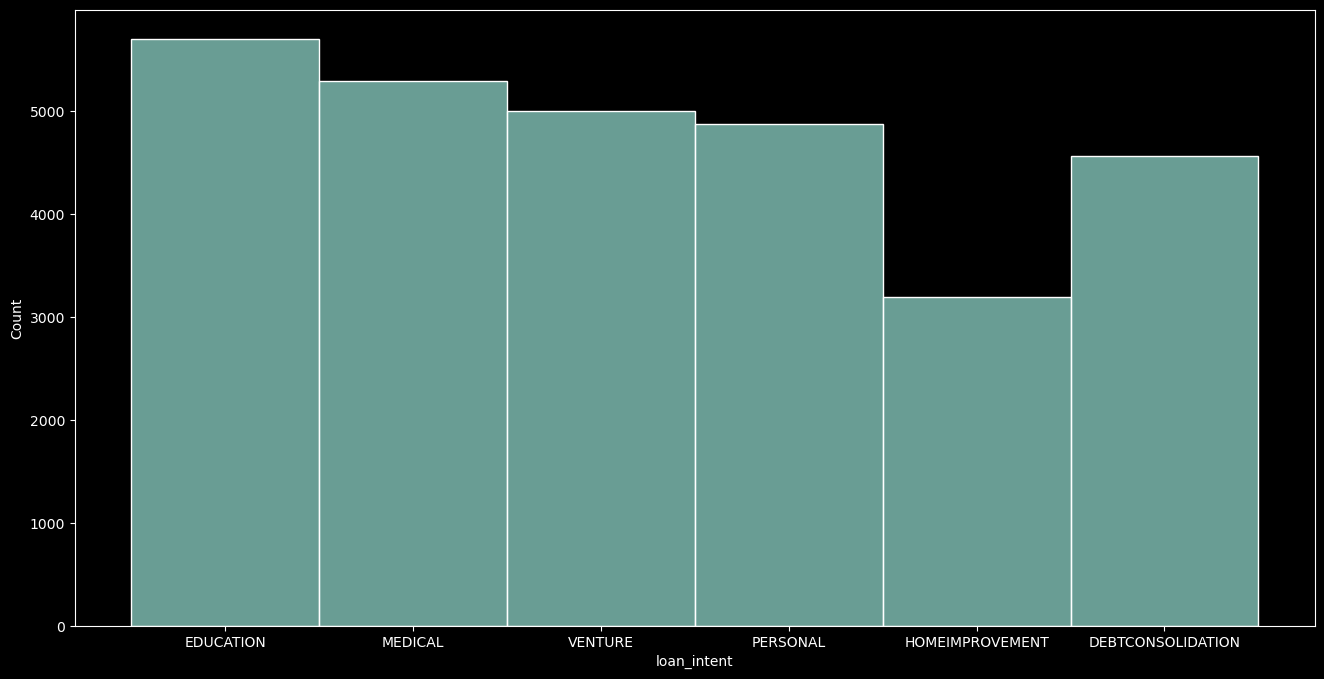

_________________________________________________
COLUNA: loan_grade
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 7
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:28623
-------------------------------------------------
Contagem de valores:
loan_grade
A    9400
B    9148
C    5697
D    3247
E     870
F     209
G      59
Name: count, dtype: int64
-------------------------------------------------


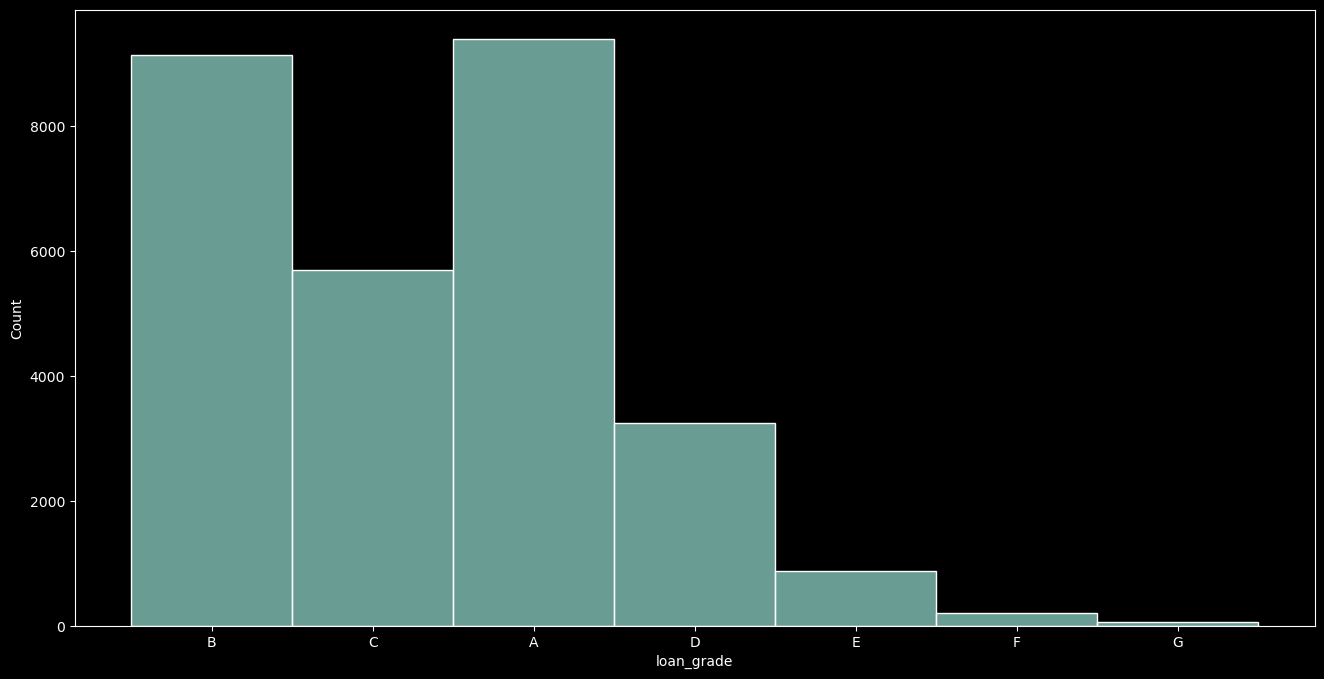

_______________________________________________________
COLUNA: loan_amnt
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 728
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:27902
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.000000
mean      9655.202585
std       6327.602124
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64
-------------------------------------------------------


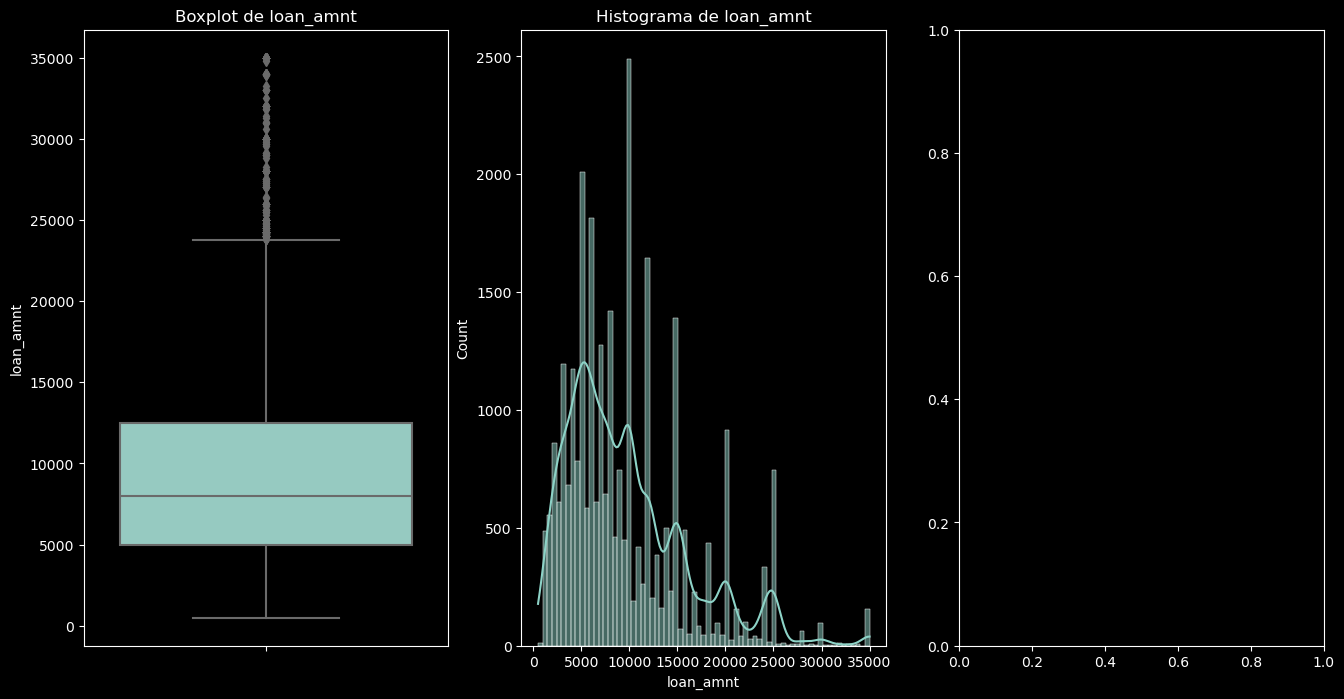

_______________________________________________________
COLUNA: loan_int_rate
-------------------------------------------------------
Tipo da coluna: float64
-------------------------------------------------------
Valores unicos: 348
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28282
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.000000
mean        11.039865
std          3.229448
min          5.420000
25%          7.900000
50%         10.990000
75%         13.480000
max         23.220000
Name: loan_int_rate, dtype: float64
-------------------------------------------------------


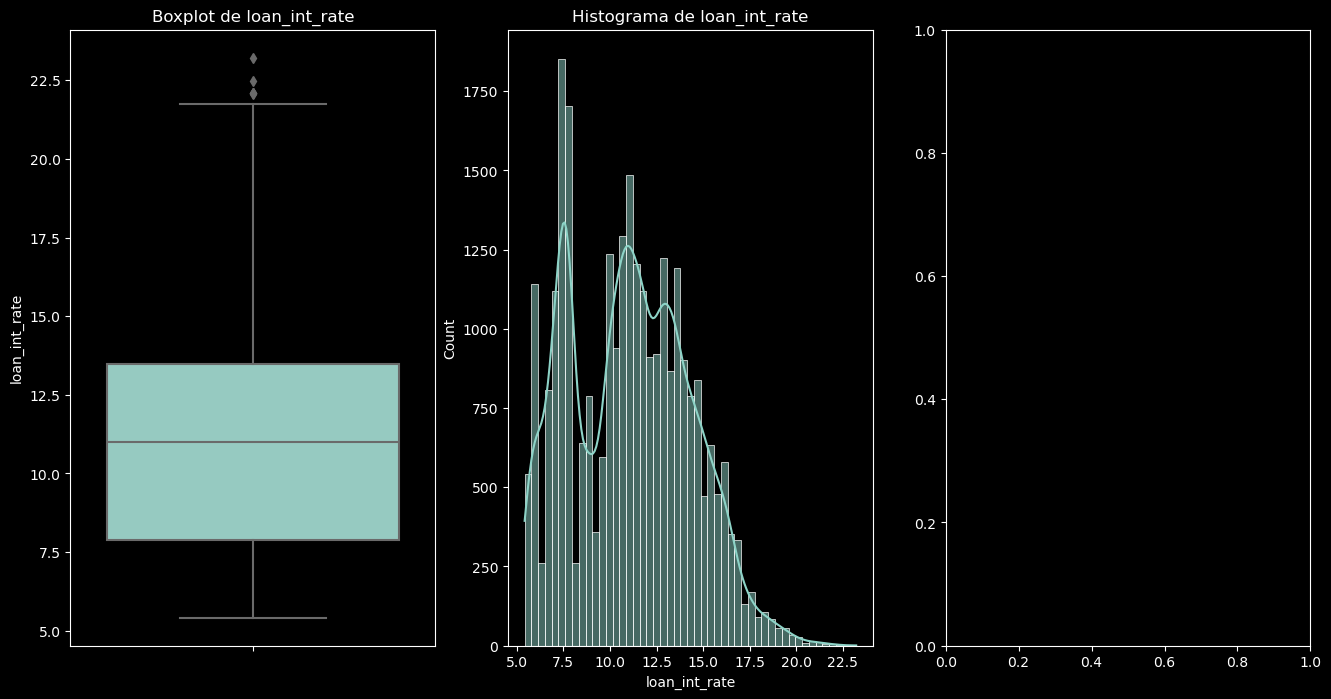

_______________________________________________________
COLUNA: loan_status
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 2
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28628
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.000000
mean         0.216626
std          0.411953
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64
-------------------------------------------------------


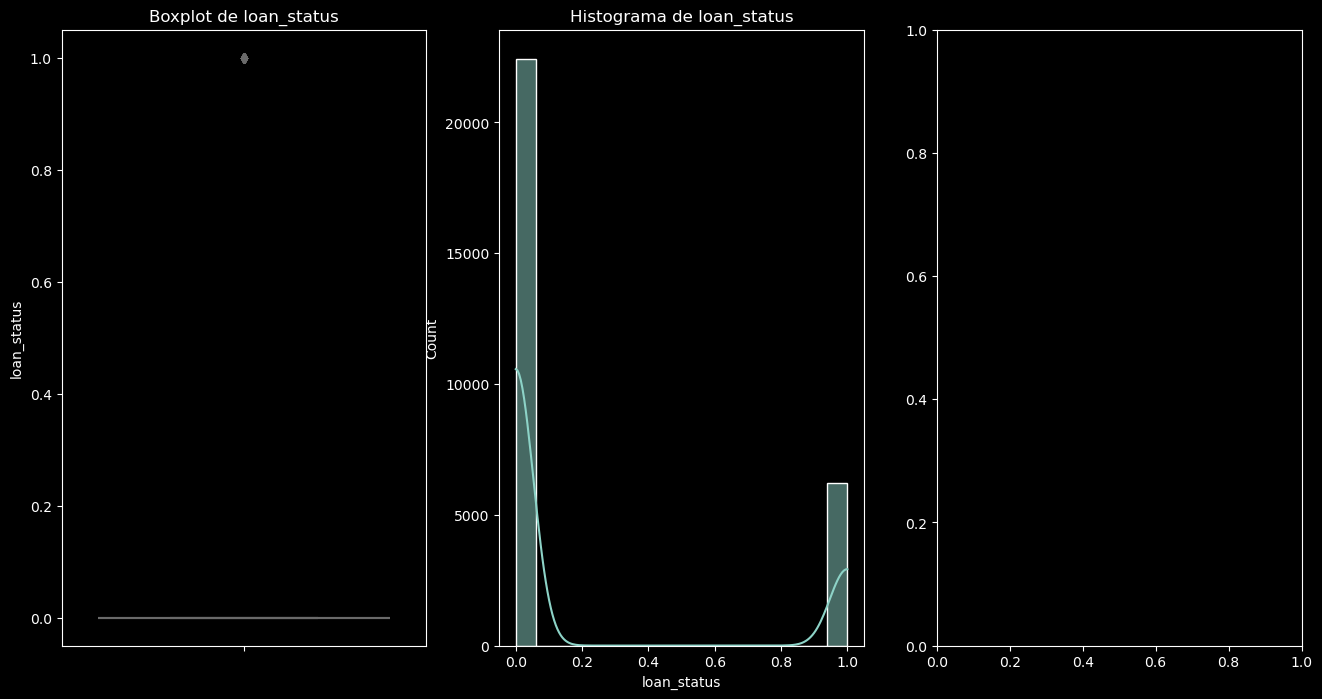

_______________________________________________________
COLUNA: loan_percent_income
-------------------------------------------------------
Tipo da coluna: float64
-------------------------------------------------------
Valores unicos: 77
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28553
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.000000
mean         0.169492
std          0.106363
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64
-------------------------------------------------------


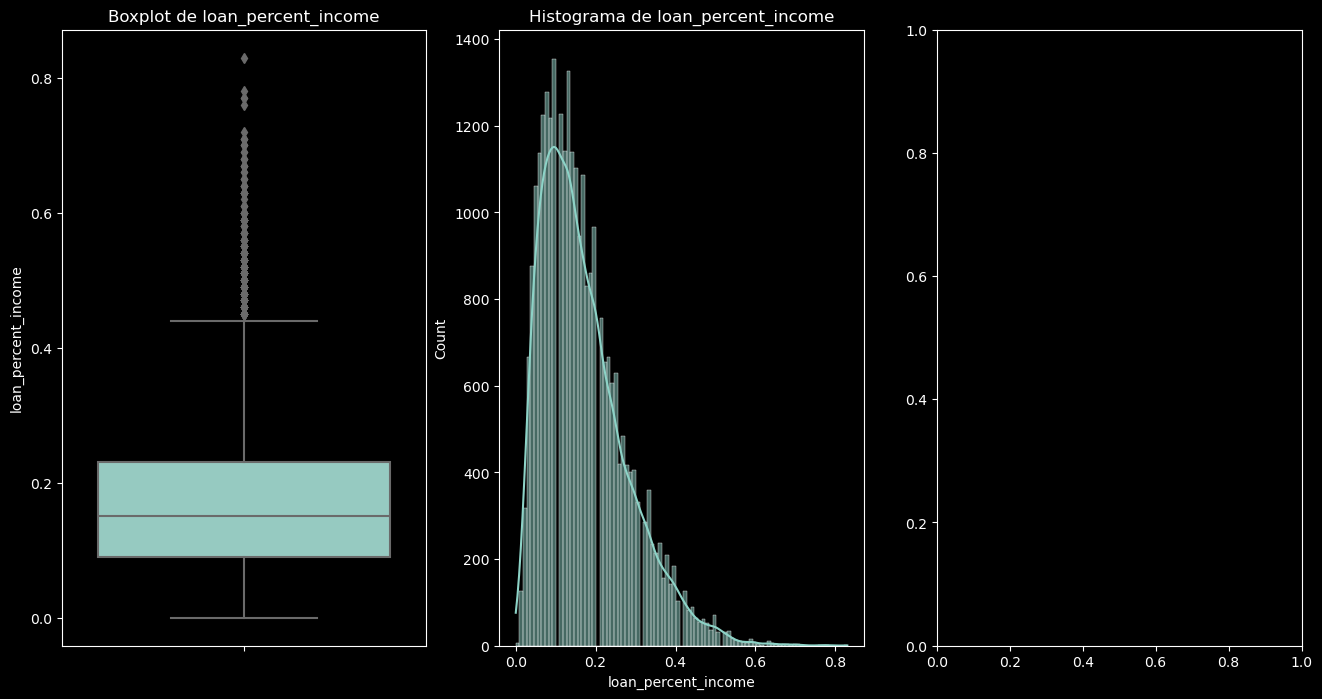

_________________________________________________
COLUNA: cb_person_default_on_file
-------------------------------------------------
Tipo da coluna: object
-------------------------------------------------
Valores unicos: 2
-------------------------------------------------
Valores nulos:0
-------------------------------------------------
Valores duplicados:28628
-------------------------------------------------
Contagem de valores:
cb_person_default_on_file
N    23528
Y     5102
Name: count, dtype: int64
-------------------------------------------------


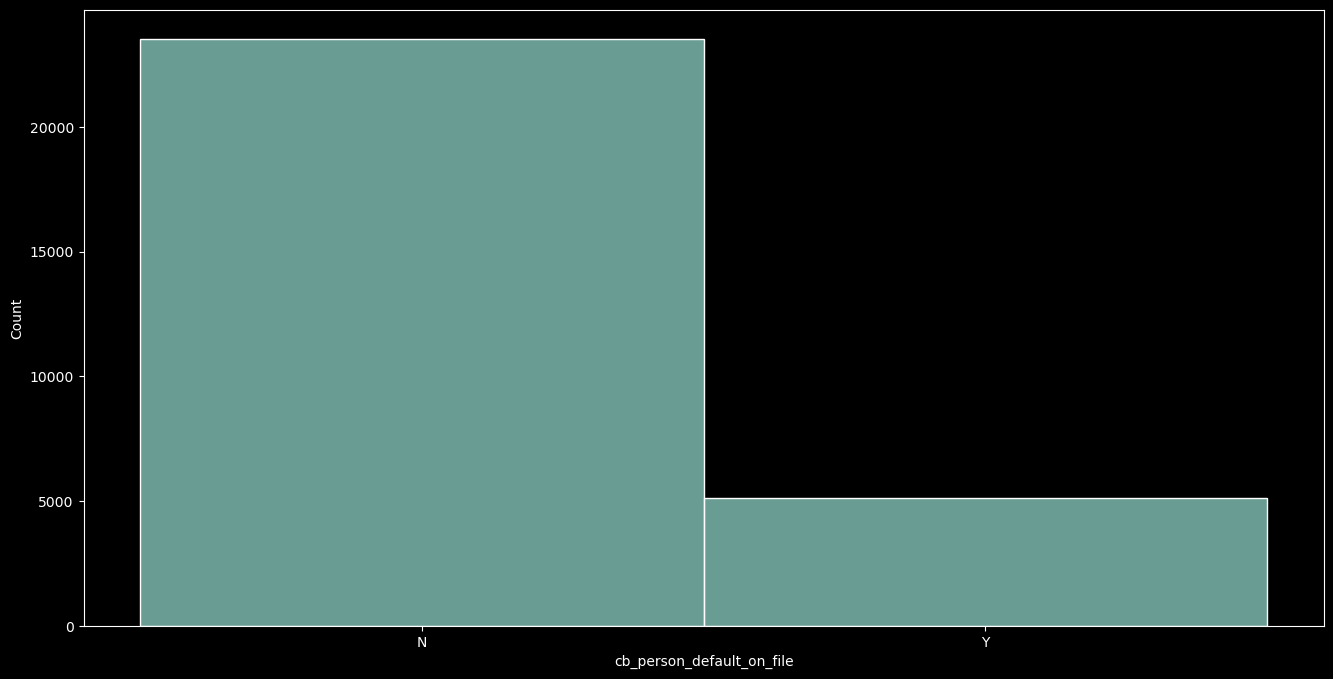

_______________________________________________________
COLUNA: cb_person_cred_hist_length
-------------------------------------------------------
Tipo da coluna: int64
-------------------------------------------------------
Valores unicos: 29
-------------------------------------------------------
Valores nulos:0
-------------------------------------------------------
Valores duplicados:28601
-------------------------------------------------------
Analisando a média, mediana, desvio padrão e quartis:
count    28630.000000
mean         5.792281
std          4.034396
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64
-------------------------------------------------------


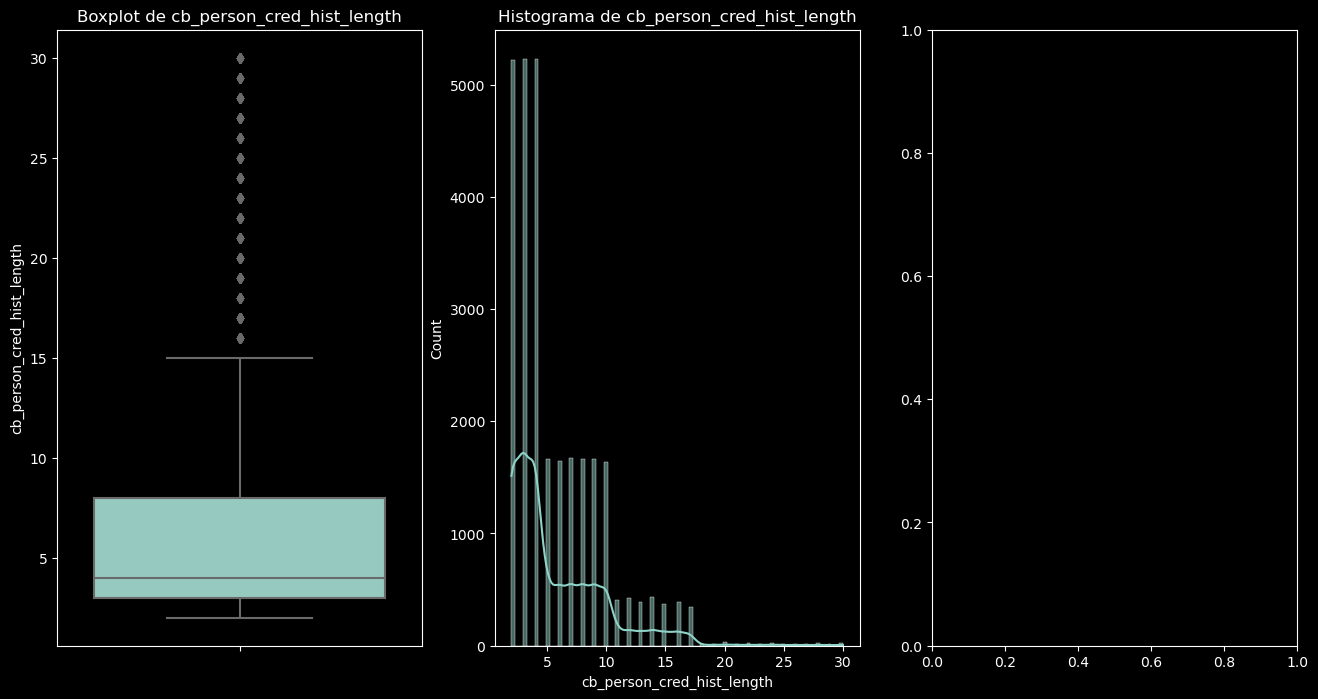

In [139]:
analise(df1)

### **Pré-Processamento dos dados**

In [141]:
df1 = df1[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
        'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']]

In [142]:
df1 = pd.get_dummies(df, columns= ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])
df1

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,True,False,...,False,False,False,True,False,False,False,False,True,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,True,False,...,False,True,False,False,False,False,False,False,True,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,True,False,False,False,False,False,True,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,True,False,...,False,False,True,False,False,False,False,False,True,False


In [143]:
df1.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [144]:
df1[[ 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']] = df1[[ 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']].astype('float64')

In [145]:
df1

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [146]:
df1 = df1[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y', 'loan_status']]

In [147]:
df1

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,22,59000,123.0,35000,16.02,0.59,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,21,9600,5.0,1000,11.14,0.10,2,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,25,9600,1.0,5500,12.87,0.57,3,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,23,65500,4.0,35000,15.23,0.53,2,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,24,54400,8.0,35000,14.27,0.55,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
32577,54,120000,4.0,17625,7.49,0.15,19,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
32578,65,76000,3.0,35000,10.99,0.46,28,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
32579,56,150000,5.0,15000,11.48,0.10,26,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [148]:
x = df1.drop('loan_status', axis=1)
x

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0.10,2,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,0.57,3,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,0.53,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,0.55,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,17625,7.49,0.15,19,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,35000,10.99,0.46,28,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32579,56,150000,5.0,15000,11.48,0.10,26,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
previsores_esc = StandardScaler().fit_transform(x)

In [150]:
y = df1.loc[:,'loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [170]:
x = np.array(previsores_esc, dtype= "float32")
y = np.array(y, dtype= "float32")

x.shape , y.shape

((32581, 26), (32581,))

In [171]:
y

array([1., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [172]:
x

array([[-0.90337384, -0.11414329, 28.535538  , ..., -0.04436442,
        -2.1612942 ,  2.1612942 ],
       [-1.0609043 , -0.9111467 ,  0.05076896, ..., -0.04436442,
         0.46268576, -0.46268576],
       [-0.43078262, -0.9111467 , -0.91481644, ..., -0.04436442,
         0.46268576, -0.46268576],
       ...,
       [ 5.8704333 ,  0.16012914, -0.43202373, ..., -0.04436442,
         0.46268576, -0.46268576],
       [ 4.4526596 ,  1.354021  ,  0.05076896, ..., -0.04436442,
         0.46268576, -0.46268576],
       [ 6.0279636 , -0.38841572, -0.6734201 , ..., -0.04436442,
         0.46268576, -0.46268576]], dtype=float32)

### **Criando os Modelos de Machine Learning**

In [174]:
class class_torch(nn.Module):
    def __init__(self, activation, neurons, initializer):
        super(class_torch,self).__init__()
        # 26 -> 14 -> 14 -> 1
        self.dense0 = nn.Linear(26, neurons)
        initializer(self.dense0.weight)
        self.activation0 = activation
        self.dense1 = nn.Linear(neurons, neurons)
        initializer(self.dense1.weight)
        self.activation1 = activation
        self.dense2 = nn.Linear(neurons, 1)
        initializer(self.dense2.weight)
        self.output = nn.Sigmoid()

    def forward(self,x):
        x = self.dense0(x)
        x = self.activation0(x)
        x = self.dense1(x)
        x = self.activation1(x)
        x = self.dense2(x)
        x = self.output(x)
        return x 



In [175]:
classificador_sklearn = NeuralNetBinaryClassifier(module=class_torch, lr= 0.001, 
                                        optimizer__weight_decay = 0.0001,train_split=False)

params = {'batch_size': [10,26],
          'max_epochs': [50,100],
          'optimizer': [torch.optim.Adam], #torch.optim.SGD],
          'criterion': [torch.nn.BCELoss], #torch.nn.HingeEmbeddingLoss],
          'module__activation': [nnf.relu], #nnf.tanh],
          'module__neurons': [7,14],
          'module__initializer': [torch.nn.init.uniform_]} #,torch.nn.init.normal_]

grid_search = GridSearchCV(estimator= classificador_sklearn, param_grid= params,
                                   scoring='accuracy', cv=2)

grid_search = grid_search.fit(x,y)


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/classifier.py", line 348, in fit
    return super().fit(X, y, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1319, in fit
    self.partial_fit(X, y, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1278, in partial_fit
    self.fit_loop(X, y, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1190, in fit_loop
    self.run_single_epoch(iterator_train, training=True, prefix="train",
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1226, in run_single_epoch
    step = step_fn(batch, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1105, in train_step
    self._step_optimizer(step_fn)
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1060, in _step_optimizer
    optimizer.step(step_fn)
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/optim/optimizer.py", line 385, in wrapper
    out = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/optim/optimizer.py", line 76, in _use_grad
    ret = func(self, *args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/optim/adam.py", line 146, in step
    loss = closure()
           ^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1094, in step_fn
    step = self.train_step_single(batch, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 994, in train_step_single
    loss = self.get_loss(y_pred, yi, X=Xi, training=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/skorch/net.py", line 1665, in get_loss
    return self.criterion_(y_pred, y_true)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py", line 618, in forward
    return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py", line 3127, in binary_cross_entropy
    return torch._C._nn.binary_cross_entropy(input, target, weight, reduction_enum)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: all elements of input should be between 0 and 1
